<a href="https://colab.research.google.com/github/rbhargava03/astro100finalproject/blob/main/Ast100FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os

Mounted at /content/drive


In [2]:
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [3]:
## Putting Data in lists

dir = 'drive/MyDrive/Harvard/2025.0318'

bias_list = glob.glob(dir+"/*BIAS.fits")
flat_listV = glob.glob(dir+"/*FLATV.fits")
flat_listB = glob.glob(dir+"/*FLATB.fits")
flat_listB.remove("drive/MyDrive/Harvard/2025.0318/0212.FLATB.fits")
science_V = glob.glob(dir+"/0036.M67.fits")
science_B = glob.glob(dir+"/0049.M67.fits")

In [4]:
## Checking contents of the folders

print(bias_list)
print(flat_listV)
print(flat_listB)
print(science_V)
print(science_B)

['drive/MyDrive/Harvard/2025.0318/0001.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0005.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0006.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0007.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0008.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0009.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0010.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0014.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0162.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0163.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0165.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0167.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0168.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0169.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0002.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0003.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0004.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0160.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0161.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0164.BIAS.fits',

In [5]:
## Creating Master Bias

bdata_array_full_1 = []
bdata_array_full_2 = []
bdata_array_full_3 = []
bdata_array_full_4 = []

for i, fn in enumerate(bias_list):
    bdata1 = fits.getdata(fn,1)
    bdata_array_full_1.append(bdata1[None])

    bdata2 = fits.getdata(fn,2)
    bdata_array_full_2.append(bdata2[None])

    bdata3 = fits.getdata(fn,3)
    bdata_array_full_3.append(bdata3[None])

    bdata4 = fits.getdata(fn,4)
    bdata_array_full_4.append(bdata4[None])

bdata_array_full_1 = np.concatenate(bdata_array_full_1, axis=0)
master_bias_1 = np.median(bdata_array_full_1, axis=0)

bdata_array_full_2 = np.concatenate(bdata_array_full_2, axis=0)
master_bias_2 = np.median(bdata_array_full_2, axis=0)

bdata_array_full_3 = np.concatenate(bdata_array_full_3, axis=0)
master_bias_3 = np.median(bdata_array_full_3, axis=0)

bdata_array_full_4 = np.concatenate(bdata_array_full_4, axis=0)
master_bias_4 = np.median(bdata_array_full_4, axis=0)

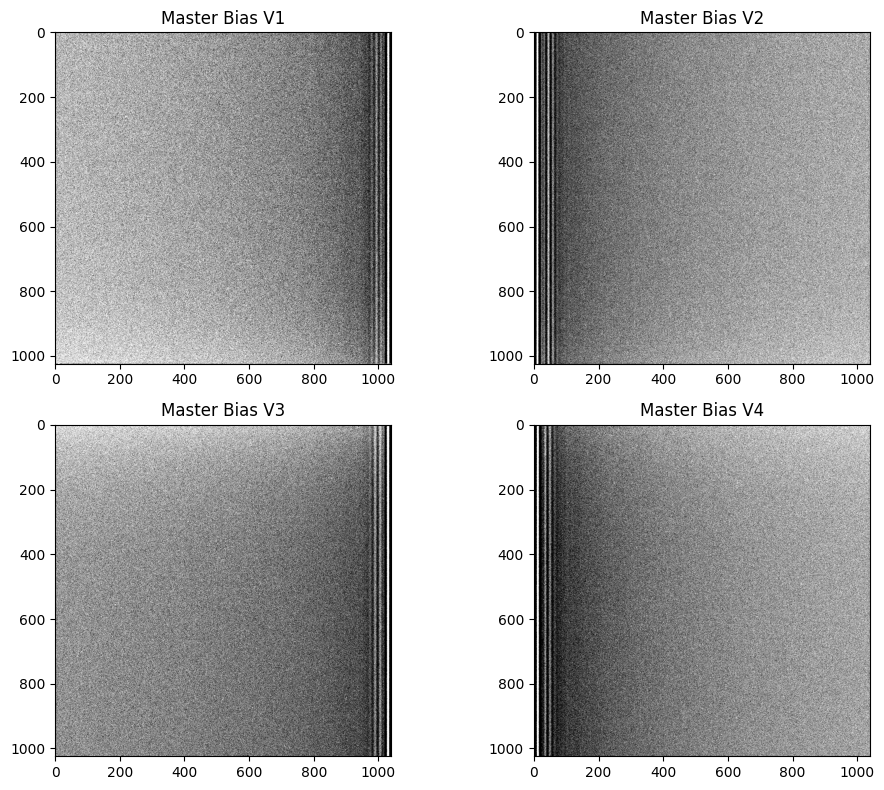

In [6]:
## Plot Master Bias

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(master_bias_1, cmap="gray", vmin=np.percentile(master_bias_1, 5), vmax=np.percentile(master_bias_1, 95))
plt.title("Master Bias V1")

plt.subplot(2, 2, 2)
plt.imshow(master_bias_2, cmap="gray", vmin=np.percentile(master_bias_2, 5), vmax=np.percentile(master_bias_2, 95))
plt.title("Master Bias V2")

plt.subplot(2, 2, 3)
plt.imshow(master_bias_3, cmap="gray", vmin=np.percentile(master_bias_3, 5), vmax=np.percentile(master_bias_3, 95))
plt.title("Master Bias V3")

plt.subplot(2, 2, 4)
plt.imshow(master_bias_4, cmap="gray", vmin=np.percentile(master_bias_4, 5), vmax=np.percentile(master_bias_4, 95))
plt.title("Master Bias V4")

plt.tight_layout()
plt.show()


In [7]:
## Creating Master Flats for V-band

fvdata_array_full_1 = []
fvdata_array_full_2 = []
fvdata_array_full_3 = []
fvdata_array_full_4 = []

for i, fn in enumerate(flat_listV):
    fvdata1 = fits.getdata(fn,1)
    fvdata_array_full_1.append(fvdata1[None]-master_bias_1)

    fvdata2 = fits.getdata(fn,2)
    fvdata_array_full_2.append(fvdata2[None]-master_bias_2)

    fvdata3 = fits.getdata(fn,3)
    fvdata_array_full_3.append(fvdata3[None]-master_bias_3)

    fvdata4 = fits.getdata(fn,4)
    fvdata_array_full_4.append(fvdata4[None]-master_bias_4)

fvdata_array_full_1 = np.concatenate(fvdata_array_full_1, axis=0)
master_flatv_1 = np.median(fvdata_array_full_1, axis=0)

fvdata_array_full_2 = np.concatenate(fvdata_array_full_2, axis=0)
master_flatv_2 = np.median(fvdata_array_full_2, axis=0)

fvdata_array_full_3 = np.concatenate(fvdata_array_full_3, axis=0)
master_flatv_3 = np.median(fvdata_array_full_3, axis=0)

fvdata_array_full_4 = np.concatenate(fvdata_array_full_4, axis=0)
master_flatv_4 = np.median(fvdata_array_full_4, axis=0)

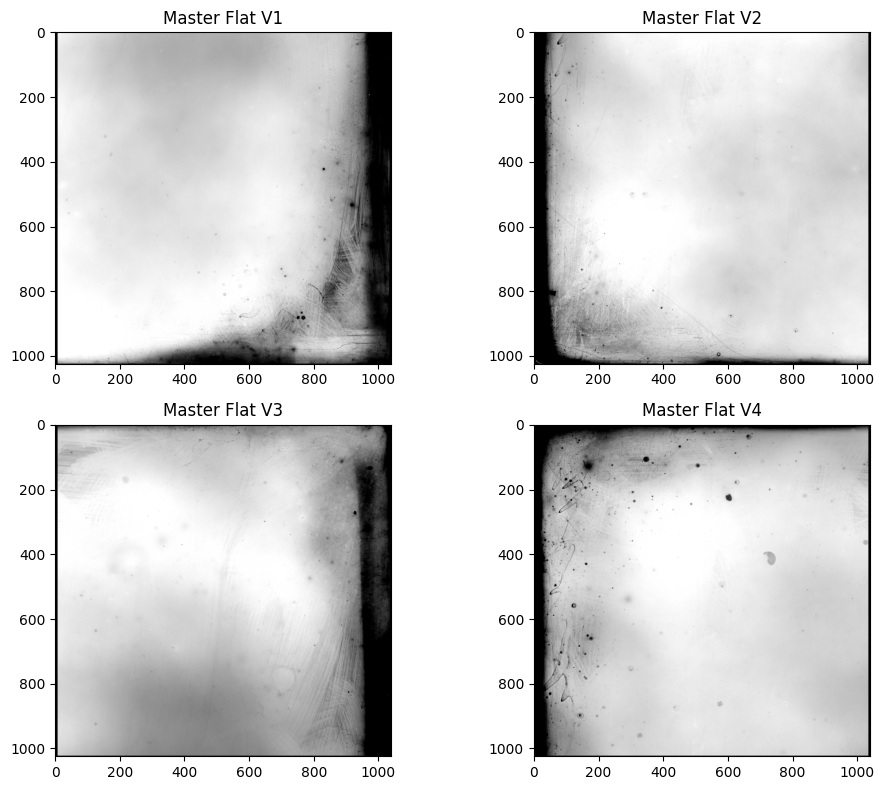

In [8]:
## Plot Master V flats

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(master_flatv_1, cmap="gray", vmin=np.percentile(master_flatv_1, 5), vmax=np.percentile(master_flatv_1, 95))
plt.title("Master Flat V1")

plt.subplot(2, 2, 2)
plt.imshow(master_flatv_2, cmap="gray", vmin=np.percentile(master_flatv_2, 5), vmax=np.percentile(master_flatv_2, 95))
plt.title("Master Flat V2")

plt.subplot(2, 2, 3)
plt.imshow(master_flatv_3, cmap="gray", vmin=np.percentile(master_flatv_3, 5), vmax=np.percentile(master_flatv_3, 95))
plt.title("Master Flat V3")

plt.subplot(2, 2, 4)
plt.imshow(master_flatv_4, cmap="gray", vmin=np.percentile(master_flatv_4, 5), vmax=np.percentile(master_flatv_4, 95))
plt.title("Master Flat V4")

plt.tight_layout()
plt.show()


In [9]:
## Creating Master Flats of B-band

fbdata_array_full_1 = []
fbdata_array_full_2 = []
fbdata_array_full_3 = []
fbdata_array_full_4 = []

for i, fn in enumerate(flat_listB):
    fbdata1 = fits.getdata(fn,1)
    fbdata_array_full_1.append(fbdata1[None]-master_bias_1)

    fbdata2 = fits.getdata(fn,2)
    fbdata_array_full_2.append(fbdata2[None]-master_bias_2)

    fbdata3 = fits.getdata(fn,3)
    fbdata_array_full_3.append(fbdata3[None]-master_bias_3)

    fbdata4 = fits.getdata(fn,4)
    fbdata_array_full_4.append(fbdata4[None]-master_bias_4)

fbdata_array_full_1 = np.concatenate(fbdata_array_full_1, axis=0)
master_flatb_1 = np.median(fbdata_array_full_1, axis=0)

fbdata_array_full_2 = np.concatenate(fbdata_array_full_2, axis=0)
master_flatb_2 = np.median(fbdata_array_full_2, axis=0)

fbdata_array_full_3 = np.concatenate(fbdata_array_full_3, axis=0)
master_flatb_3 = np.median(fbdata_array_full_3, axis=0)

fbdata_array_full_4 = np.concatenate(fbdata_array_full_4, axis=0)
master_flatb_4 = np.median(fbdata_array_full_4, axis=0)

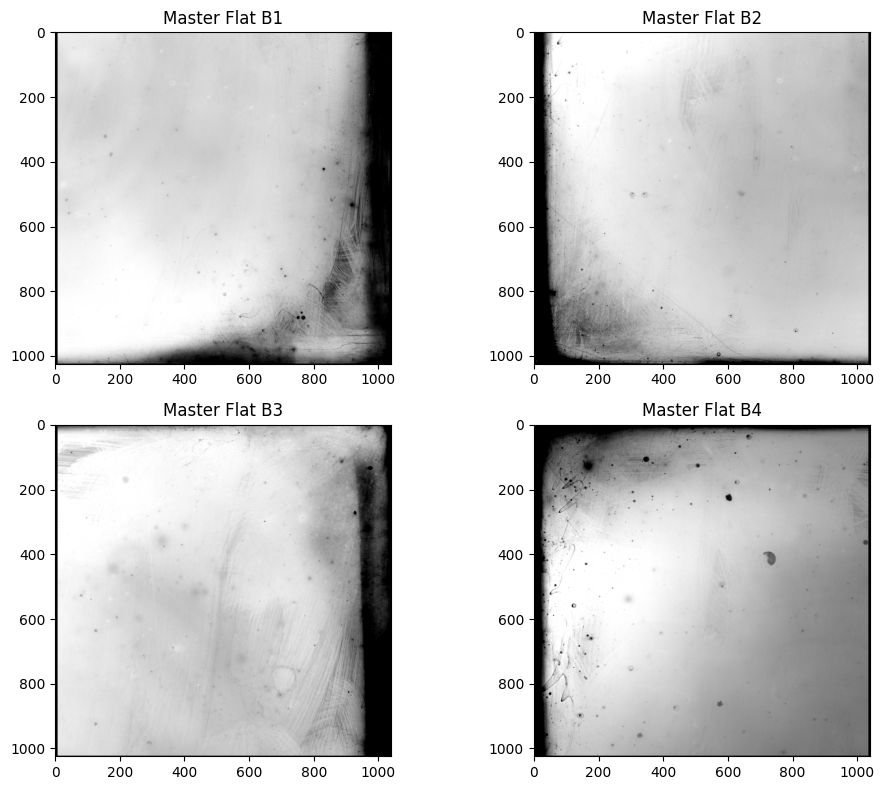

In [10]:
## Plot Master B flats

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(master_flatb_1, cmap="gray", vmin=np.percentile(master_flatb_1, 5), vmax=np.percentile(master_flatb_1, 95))
plt.title("Master Flat B1")

plt.subplot(2, 2, 2)
plt.imshow(master_flatb_2, cmap="gray", vmin=np.percentile(master_flatb_2, 5), vmax=np.percentile(master_flatb_2, 95))
plt.title("Master Flat B2")

plt.subplot(2, 2, 3)
plt.imshow(master_flatb_3, cmap="gray", vmin=np.percentile(master_flatb_3, 5), vmax=np.percentile(master_flatb_3, 95))
plt.title("Master Flat B3")

plt.subplot(2, 2, 4)
plt.imshow(master_flatb_4, cmap="gray", vmin=np.percentile(master_flatb_4, 5), vmax=np.percentile(master_flatb_4, 95))
plt.title("Master Flat B4")

plt.tight_layout()
plt.show()


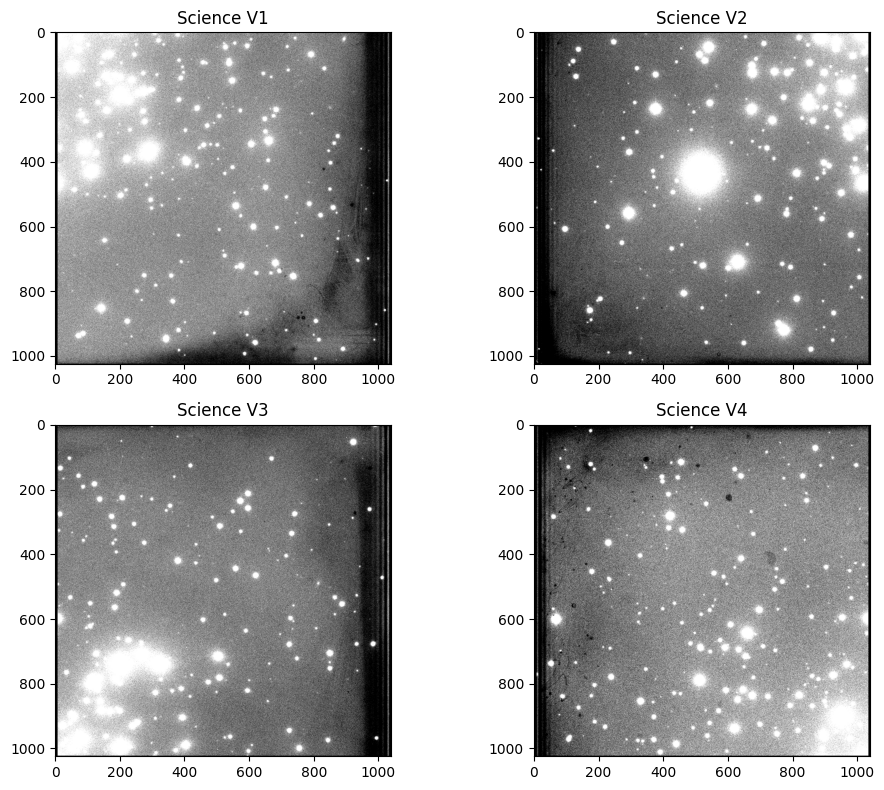

 [astropy.io.fits.verify]



SIMPLE  =                    T / Primary FITS image array                       
BITPIX  =                   16                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T / Fits standard                                  
OBJECT  = 'M67               ' / OBJECT NAME                                    
RA      = '08:51:23          ' / RA                                             
DEC     = '11:48:50          ' / DEC                                            
EPOCH   = '2000              ' / EPOCH                                          
AIR     = '1.07              ' / AIR MASS                                       
RRA     = '08:51:23          ' / RRA                                            
RDEC    = '11:48:50          ' / RDEC                                           
REPOCH  = '2000              ' / TEPOCH                                         
TRA     = '08:51:15.7       

In [11]:
# Plot V-Band Science Data

#Reload V-Band Data
science_V = glob.glob(dir+"/0036.M67.fits")

#Confirm Filter is V
fits.getheader(science_V[0])

#Get data for each quadrant from the fits file
science_im_V1 = fits.getdata(science_V[0],1)
science_im_V2 = fits.getdata(science_V[0],2)
science_im_V3 = fits.getdata(science_V[0],3)
science_im_V4 = fits.getdata(science_V[0],4)

#Plot
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(science_im_V1, cmap="gray", vmin=np.percentile(science_im_V1, 5), vmax=np.percentile(science_im_V1, 95))
plt.title("Science V1")

plt.subplot(2, 2, 2)
plt.imshow(science_im_V2, cmap="gray", vmin=np.percentile(science_im_V2, 5), vmax=np.percentile(science_im_V2, 95))
plt.title("Science V2")

plt.subplot(2, 2, 3)
plt.imshow(science_im_V3, cmap="gray", vmin=np.percentile(science_im_V3, 5), vmax=np.percentile(science_im_V3, 95))
plt.title("Science V3")

plt.subplot(2, 2, 4)
plt.imshow(science_im_V4, cmap="gray", vmin=np.percentile(science_im_V4, 5), vmax=np.percentile(science_im_V4, 95))
plt.title("Science V4")

plt.tight_layout()
plt.show()

fits.getheader(science_V[0])

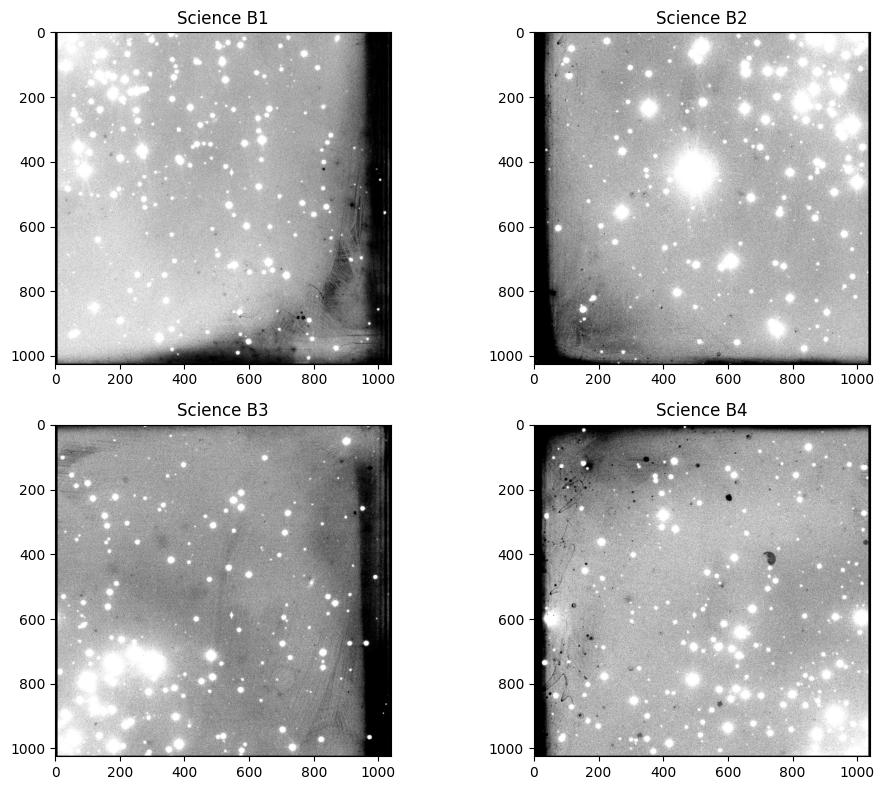

SIMPLE  =                    T / Primary FITS image array                       
BITPIX  =                   16                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T / Fits standard                                  
OBJECT  = 'M67               ' / OBJECT NAME                                    
RA      = '08:51:23          ' / RA                                             
DEC     = '11:48:50          ' / DEC                                            
EPOCH   = '2000              ' / EPOCH                                          
AIR     = '1.07              ' / AIR MASS                                       
RRA     = '08:51:23          ' / RRA                                            
RDEC    = '11:48:50          ' / RDEC                                           
REPOCH  = '2000              ' / TEPOCH                                         
TRA     = '08:51:15.7       

In [12]:
# Plot B-Band Science Data

#Confirm Filter is V
fits.getheader(science_B[0])

#Get data for each quadrant from the fits file
science_im_B1 = fits.getdata(science_B[0],1)
science_im_B2 = fits.getdata(science_B[0],2)
science_im_B3 = fits.getdata(science_B[0],3)
science_im_B4 = fits.getdata(science_B[0],4)

#Plot
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(science_im_B1, cmap="gray", vmin=np.percentile(science_im_B1, 5), vmax=np.percentile(science_im_B1, 95))
plt.title("Science B1")

plt.subplot(2, 2, 2)
plt.imshow(science_im_B2, cmap="gray", vmin=np.percentile(science_im_B2, 5), vmax=np.percentile(science_im_B1, 95))
plt.title("Science B2")

plt.subplot(2, 2, 3)
plt.imshow(science_im_B3, cmap="gray", vmin=np.percentile(science_im_B3, 5), vmax=np.percentile(science_im_B3, 95))
plt.title("Science B3")

plt.subplot(2, 2, 4)
plt.imshow(science_im_B4, cmap="gray", vmin=np.percentile(science_im_B4, 5), vmax=np.percentile(science_im_B4, 95))
plt.title("Science B4")

plt.tight_layout()
plt.show()

fits.getheader(science_V[0])

In [13]:
# define clip value for cropping below
clip = 100

def crop(img, quadrant, clip):

    ny, nx = img.shape  # full dimensions of the quadrant
    if quadrant == 4:         # top left: trim top and left
        return img[clip:ny, clip:nx]
    elif quadrant == 2:       # bottom left: trim bottom and left
        return img[0:ny-clip, clip:nx]
    elif quadrant == 3:       # top right: trim top and right
        return img[clip:ny, 0:nx-clip]
    elif quadrant == 1:       # bottom right: trim bottom and right
        return img[0:ny-clip, 0:nx-clip]


science_im_V1 = crop(science_im_V1, quadrant=4, clip=clip)
science_im_V2 = crop(science_im_V2, quadrant=2, clip=clip)
science_im_V3 = crop(science_im_V3, quadrant=3, clip=clip)
science_im_V4 = crop(science_im_V4, quadrant=1, clip=clip)

science_im_B1 = crop(science_im_B1, quadrant=4, clip=clip)
science_im_B2 = crop(science_im_B2, quadrant=2, clip=clip)
science_im_B3 = crop(science_im_B3, quadrant=3, clip=clip)
science_im_B4 = crop(science_im_B4, quadrant=1, clip=clip)

master_bias_1 = crop(master_bias_1, quadrant=4, clip=clip)
master_bias_2 = crop(master_bias_2, quadrant=2, clip=clip)
master_bias_3 = crop(master_bias_3, quadrant=3, clip=clip)
master_bias_4 = crop(master_bias_4, quadrant=1, clip=clip)

master_flatv_1 = crop(master_flatv_1, quadrant=4, clip=clip)
master_flatv_2 = crop(master_flatv_2, quadrant=2, clip=clip)
master_flatv_3 = crop(master_flatv_3, quadrant=3, clip=clip)
master_flatv_4 = crop(master_flatv_4, quadrant=1, clip=clip)

master_flatb_1 = crop(master_flatb_1, quadrant=4, clip=clip)
master_flatb_2 = crop(master_flatb_2, quadrant=2, clip=clip)
master_flatb_3 = crop(master_flatb_3, quadrant=3, clip=clip)
master_flatb_4 = crop(master_flatb_4, quadrant=1, clip=clip)

In [14]:
#data processing
def process_image(data, bias, flat):
    return (data - bias) / flat

# already subtracted bias from flat above

# process science images
processedV1 = process_image(science_im_V1, master_bias_1, master_flatv_1)
processedV2 = process_image(science_im_V2, master_bias_2, master_flatv_2)
processedV3 = process_image(science_im_V3, master_bias_3, master_flatv_3)
processedV4 = process_image(science_im_V4, master_bias_4, master_flatv_4)

processedB1 = process_image(science_im_B1, master_bias_1, master_flatb_1)
processedB2 = process_image(science_im_B2, master_bias_2, master_flatb_2)
processedB3 = process_image(science_im_B3, master_bias_3, master_flatb_3)
processedB4 = process_image(science_im_B4, master_bias_4, master_flatb_4)



<ipython-input-14-575b701d2a06>:3: RuntimeWarning: divide by zero encountered in divide
  return (data - bias) / flat
<ipython-input-14-575b701d2a06>:3: RuntimeWarning: invalid value encountered in divide
  return (data - bias) / flat


Text(0.5, 1.0, 'Final V4')

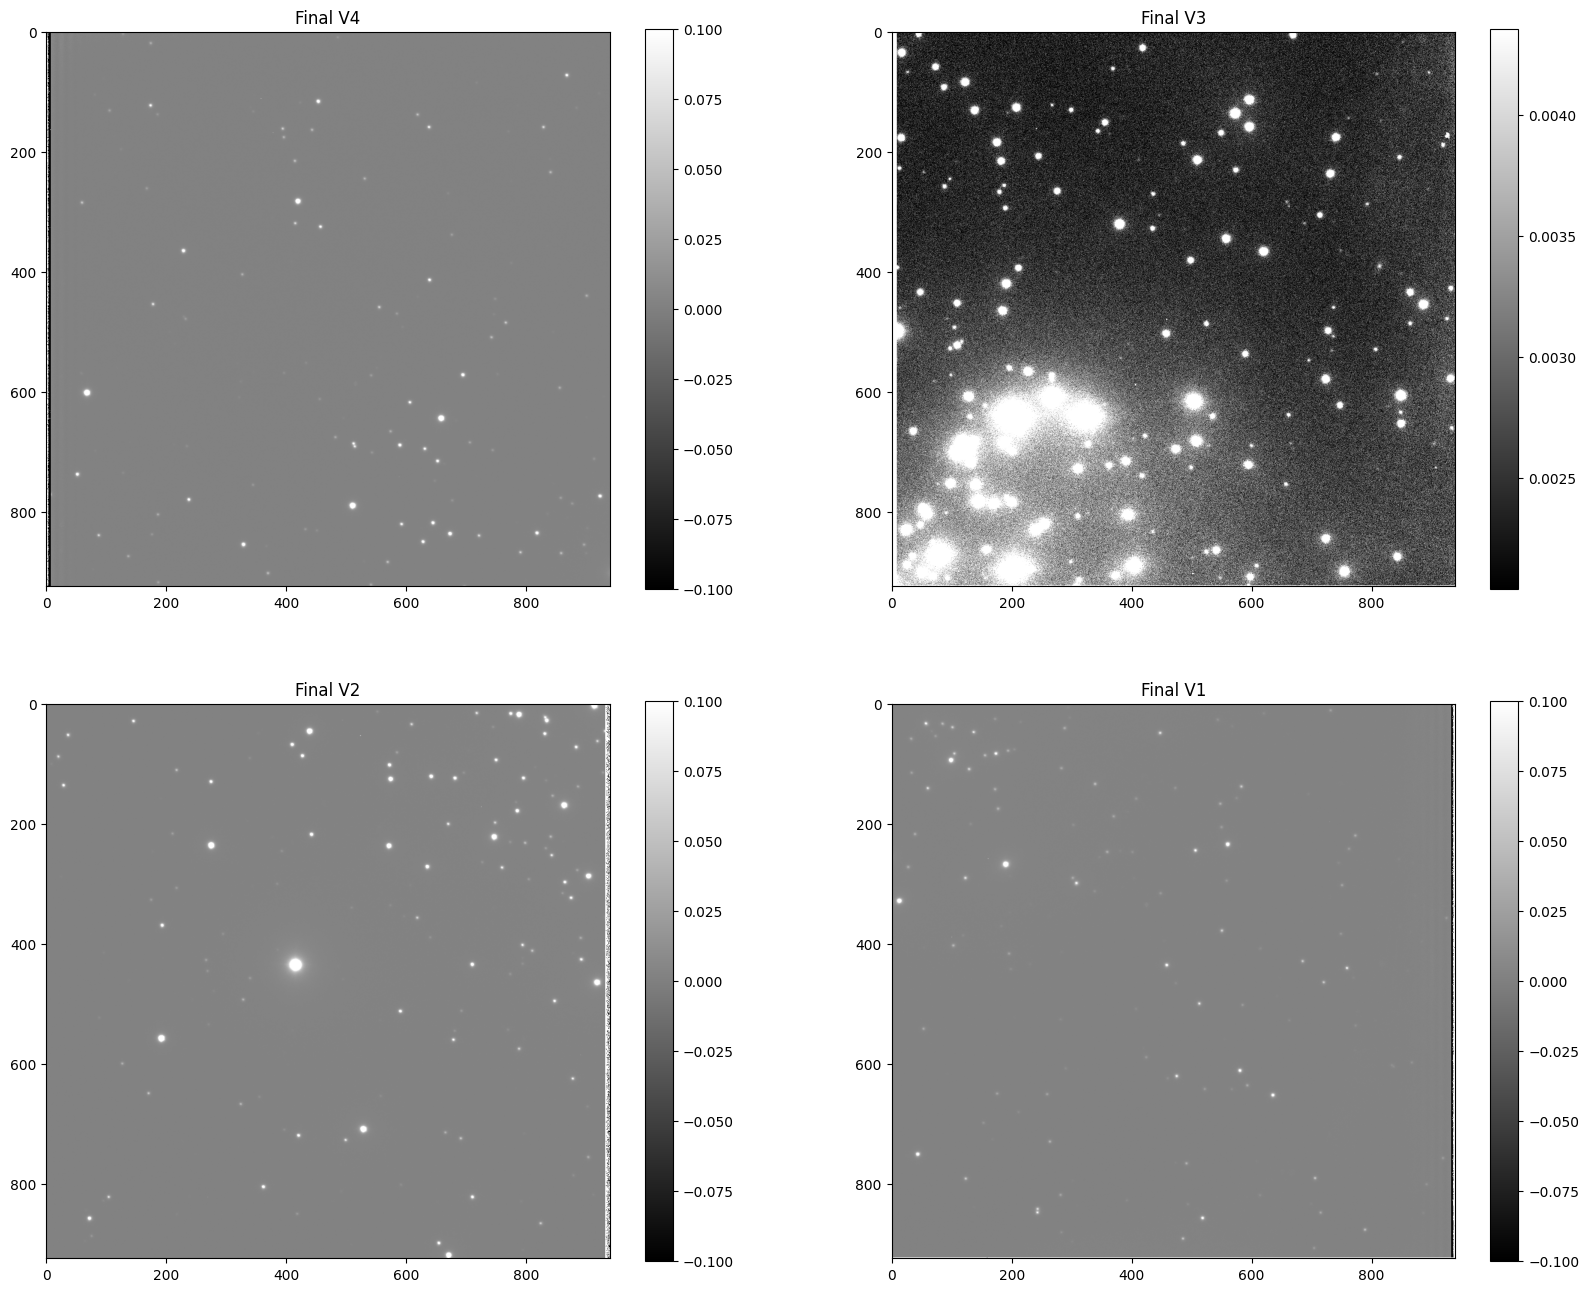

In [15]:
#plot final processed V-Band data
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 4)
plt.imshow(processedV1, cmap="gray", vmin=np.percentile(processedV1, 5), vmax=np.percentile(processedV1, 95))
colorbar = plt.colorbar()
plt.title("Final V1")

plt.subplot(2, 2, 3)
plt.imshow(processedV2, cmap="gray", vmin=np.percentile(processedV2, 5), vmax=np.percentile(processedV2, 95))
colorbar = plt.colorbar()
plt.title("Final V2")

plt.subplot(2, 2, 2)
plt.imshow(processedV3, cmap="gray", vmin=np.percentile(processedV3, 5), vmax=np.percentile(processedV3, 95))
colorbar = plt.colorbar()
plt.title("Final V3")

plt.subplot(2, 2, 1)
plt.imshow(processedV4, cmap="gray", vmin=np.percentile(processedV4, 5), vmax=np.percentile(processedV4, 95))
colorbar = plt.colorbar()
plt.title("Final V4")


Text(0.5, 1.0, 'Final B4')

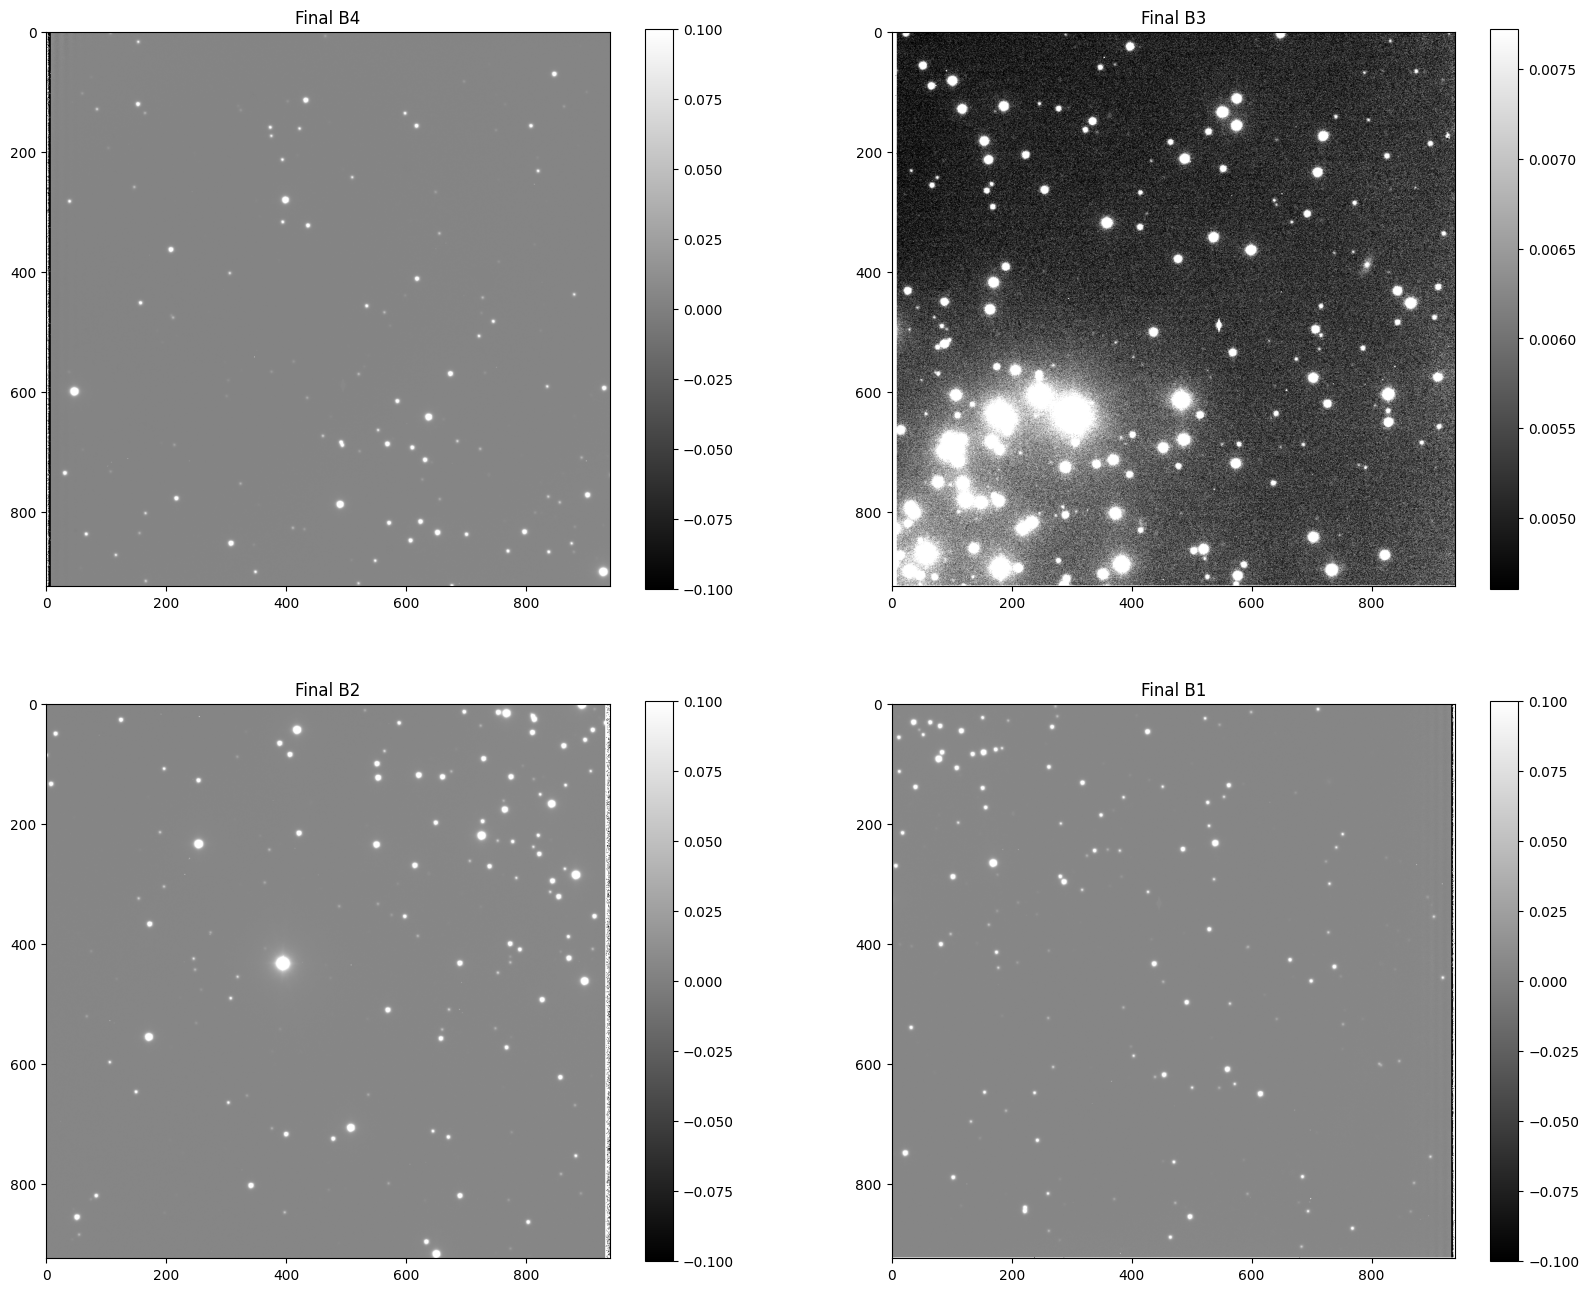

In [16]:
#plot final processed B-Band data

#Plot
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 4)
plt.imshow(processedB1, cmap="gray", vmin=np.percentile(processedB1, 5), vmax=np.percentile(processedB1, 95))
colorbar = plt.colorbar()
plt.title("Final B1")

plt.subplot(2, 2, 3)
plt.imshow(processedB2, cmap="gray", vmin=np.percentile(processedB2, 5), vmax=np.percentile(processedB2, 95))
colorbar = plt.colorbar()
plt.title("Final B2")

plt.subplot(2, 2, 2)
plt.imshow(processedB3, cmap="gray", vmin=np.percentile(processedB3, 5), vmax=np.percentile(processedB3, 95))
colorbar = plt.colorbar()
plt.title("Final B3")

plt.subplot(2, 2, 1)
plt.imshow(processedB4, cmap="gray", vmin=np.percentile(processedB4, 5), vmax=np.percentile(processedB4, 95))
colorbar = plt.colorbar()
plt.title("Final B4")



the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


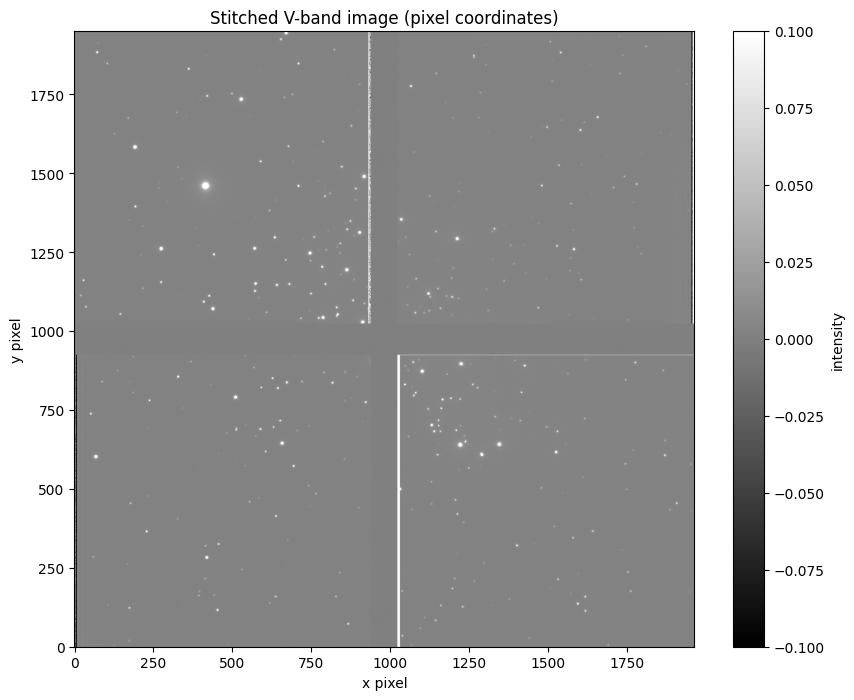

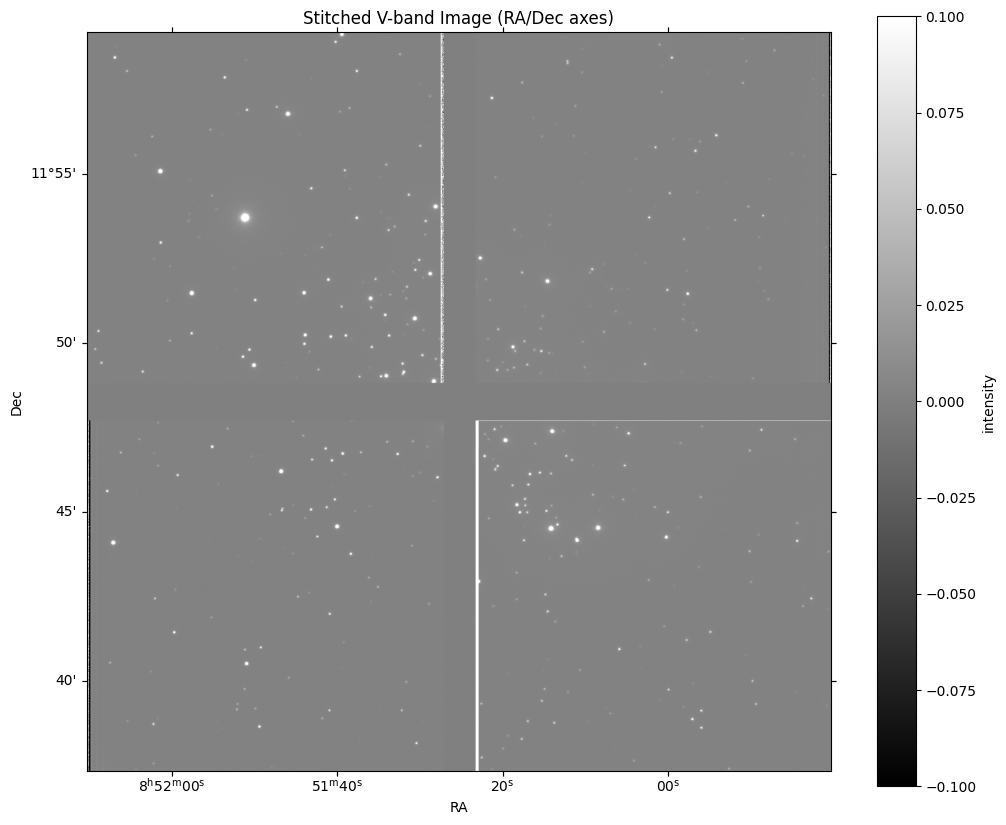

In [17]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt

# load headers and data
headers = [fits.getheader(science_V[0], i) for i in range(1, 5)] # extracts header from each of the 4 quadrants of the first V file
wcs_list = [WCS(h) for h in headers] # list of WCS for each quadrant
images = [processedV1, processedV2, processedV3, processedV4] # data from processed V-band images

# reference wcs (use first quadrant as reference)
ref_wcs = wcs_list[0]

# function that gets ra/dec center of each image
def get_center(wcs, shape):
    y, x = np.array(shape) / 2 # center coords
    return wcs.wcs_pix2world(x, y, 0)

centers = [get_center(w, img.shape) for w, img in zip(wcs_list, images)] # computes world coordinates using WC and the image shape

# convert to pixel coords in ref wcs
def to_ref_pixel(radec):
    return ref_wcs.wcs_world2pix(radec[0], radec[1], 0)

# get pixel coords of centers in the reference frame (compared to quadrant 1)
ref_pixels = np.array([to_ref_pixel(c) for c in centers])

# get quadrant shape
ny, nx = images[0].shape

# calculate offsets of centers of other quadrants releative to centers of the first image
x_offsets = ref_pixels[:, 0] - ref_pixels[0, 0]
y_offsets = ref_pixels[:, 1] - ref_pixels[0, 1]

# use min and max offsets to determing canvas size (CANVAS IS A JOINT CANVAS WITH ALL OF THE IMAGES ON IT)
min_x, max_x = int(np.floor(min(x_offsets))), int(np.ceil(max(x_offsets)))
min_y, max_y = int(np.floor(min(y_offsets))), int(np.ceil(max(y_offsets)))

# canvas size is image size + range of offsets
canvas_nx = nx + abs(max_x - min_x)
canvas_ny = ny + abs(max_y - min_y)

# create canvas and weight map (how many are pixels are on each pixel)
canvas = np.zeros((canvas_ny, canvas_nx))
weights = np.zeros((canvas_ny, canvas_nx))

# paste images onto canvas
for img, dx, dy in zip(images, x_offsets, y_offsets):
    # Adjust offset so smallest offset becomes 0
    dx = int(round(dx - min_x))
    dy = int(round(dy - min_y))

    # coords for bouding box
    y1, y2 = dy, dy + ny
    x1, x2 = dx, dx + nx

    #update canvas data and weights of each pixel
    canvas[y1:y2, x1:x2] += img
    weights[y1:y2, x1:x2] += 1

# average overlapping pixels (here there are two pixel values in the same position)
combinedV = canvas / np.where(weights == 0, 1, weights)


# plot stitched image in pixel coordinates
plt.figure(figsize=(10, 8))
plt.imshow(combinedV, origin='lower', cmap='gray',
           vmin=np.percentile(combinedV, 5), vmax=np.percentile(combinedV, 95))
plt.title("Stitched V-band image (pixel coordinates)")
plt.xlabel("x pixel")
plt.ylabel("y pixel")
plt.colorbar(label="intensity")
plt.show()


# adjust WCS for new canvas location
stitched_wcs = ref_wcs.deepcopy() # copy of reference WCS to modify it wouthout affecting the original
# adjust reference pixel values to adjust for shift we made when creating the mosaic
stitched_wcs.wcs.crpix = [
    ref_wcs.wcs.crpix[0] + round(-min_x),
    ref_wcs.wcs.crpix[1] + round(-min_y)
]

# plot with RA/Dec axes
fig = plt.figure(figsize=(12, 10))
#make axis RA/DEC using mosaic WCS
ax = fig.add_subplot(111, projection=stitched_wcs)

im = ax.imshow(combinedV, origin='lower', cmap='gray',
               vmin=np.percentile(combinedV, 5),
               vmax=np.percentile(combinedV, 95))

ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_title("Stitched V-band Image (RA/Dec axes)")
plt.colorbar(im, ax=ax, orientation='vertical', label='intensity')
plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


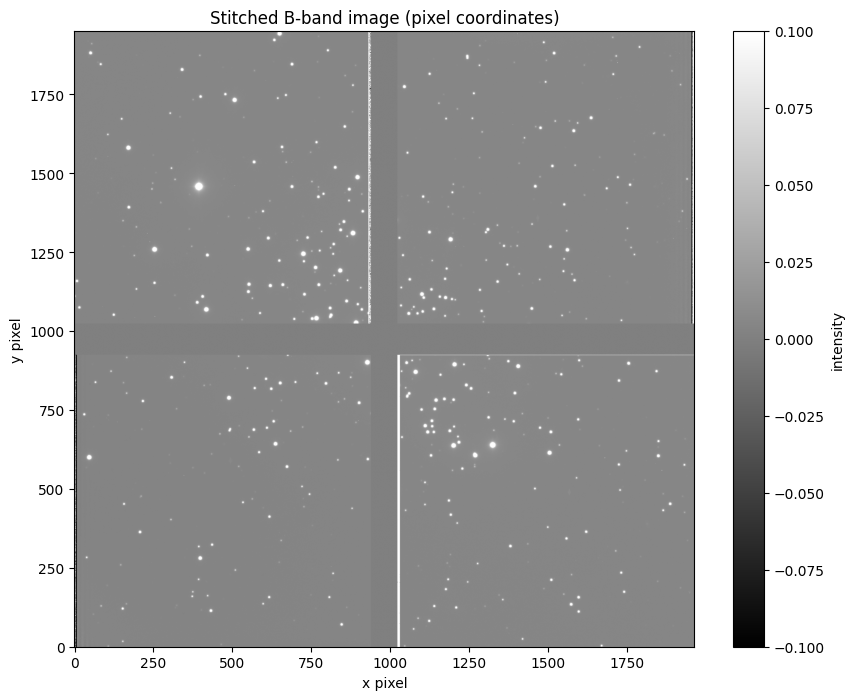

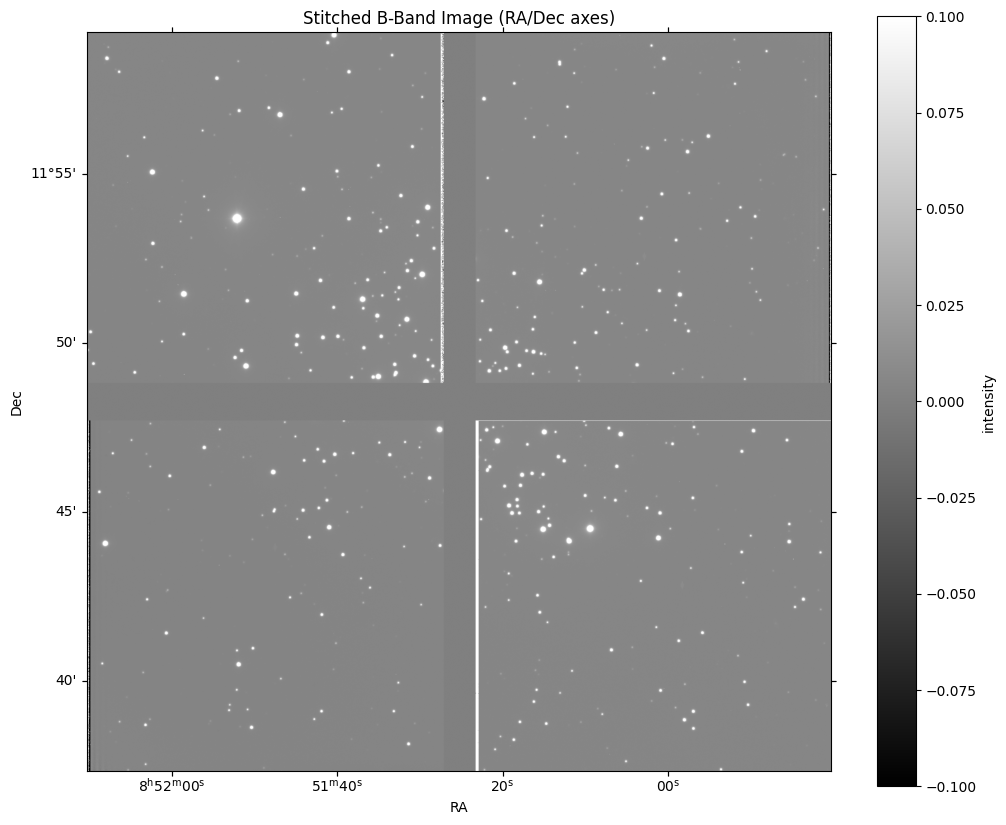

In [18]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS

# load headers and data
headers = [fits.getheader(science_B[0], i) for i in range(1, 5)]
wcs_list = [WCS(h) for h in headers]
images = [processedB1, processedB2, processedB3, processedB4]

# reference wcs
ref_wcs = wcs_list[0]

#get ra/dec center of each image
def get_center(wcs, shape):
    y, x = np.array(shape) / 2
    return wcs.wcs_pix2world(x, y, 0)

centers = [get_center(w, img.shape) for w, img in zip(wcs_list, images)]

#convert to pixel coords in ref wcs
def to_ref_pixel(radec):
    return ref_wcs.wcs_world2pix(radec[0], radec[1], 0)

ref_pixels = np.array([to_ref_pixel(c) for c in centers])

#get image shape
ny, nx = images[0].shape

# calculate offsets relative to first image
x_offsets = ref_pixels[:, 0] - ref_pixels[0, 0]
y_offsets = ref_pixels[:, 1] - ref_pixels[0, 1]

# canvas size
min_x, max_x = int(np.floor(min(x_offsets))), int(np.ceil(max(x_offsets)))
min_y, max_y = int(np.floor(min(y_offsets))), int(np.ceil(max(y_offsets)))

canvas_nx = nx + abs(max_x - min_x)
canvas_ny = ny + abs(max_y - min_y)

# create canvas and weight map
canvas = np.zeros((canvas_ny, canvas_nx))
weights = np.zeros((canvas_ny, canvas_nx))

# paste images onto canvas
for img, dx, dy in zip(images, x_offsets, y_offsets):
    dx = int(round(dx - min_x))
    dy = int(round(dy - min_y))

    y1, y2 = dy, dy + ny
    x1, x2 = dx, dx + nx

    canvas[y1:y2, x1:x2] += img
    weights[y1:y2, x1:x2] += 1

# average overlapping pixels
combinedB = canvas / np.where(weights == 0, 1, weights)


import matplotlib.pyplot as plt

# plot stitched image
plt.figure(figsize=(10, 8))
plt.imshow(combinedB, origin='lower', cmap='gray',
           vmin=np.percentile(combinedB, 5), vmax=np.percentile(combinedB, 95))
plt.title("Stitched B-band image (pixel coordinates)")
plt.xlabel("x pixel")
plt.ylabel("y pixel")
plt.colorbar(label="intensity")
plt.show()

# adjust WCS for new canvas location
stitched_wcs = ref_wcs.deepcopy()
stitched_wcs.wcs.crpix = [
    ref_wcs.wcs.crpix[0] + round(-min_x),
    ref_wcs.wcs.crpix[1] + round(-min_y)
]

# plot with RA/Dec axes
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection=stitched_wcs)

im = ax.imshow(combinedB, origin='lower', cmap='gray',
               vmin=np.percentile(combinedB, 5),
               vmax=np.percentile(combinedB, 95))

ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_title("Stitched B-Band Image (RA/Dec axes)")
plt.colorbar(im, ax=ax, orientation='vertical', label='intensity')
plt.show()


TODO

Imaging -- If your project requires multi-band imaging, you should have calibrated image mosaics for all of your science data. Please be ready to show these mosaics in class.

Photometry -- If your project requires measuring the fluxes of point sources (e.g. stars in M67), you should have a function for performing aperture photometry (checkout the astropy package "photutils"). We can revisit this in class this week as well.


In [19]:
!pip install photutils

In [20]:
import numpy as np
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture, aperture_photometry
from astropy.stats import sigma_clipped_stats

#function to automatically detect stars and perform aperture photometry.
def table_aperture_photometry(image, fwhm=3.0, threshold_factor=5.0, aperture_radius=10):
    # find statistics: mean, median, and standard deviation
    # sigma_clipped_stats clips outliers
    mean, median, std = sigma_clipped_stats(image, sigma=3.0)
    # make a DAOStarFinder object with set Full Width at Half Maximum (FWHM) and set threshold measured in stds
    daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold_factor * std)
    # use image - median background for better detection of sources
    sources = daofind(image - median)

    # make circular apertures for each brigh spot and do photometry
    positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
    #aperatures around the source centers with set aperature radius in pixels
    apertures = CircularAperture(positions, r=aperture_radius)
    # produces s table withe fluxes on the image
    phot_table = aperture_photometry(image, apertures)
    return phot_table, sources

# produces the table for V and B combined images
phot_tableV, sourcesV = table_aperture_photometry(combinedV)
phot_tableB, sourcesB = table_aperture_photometry(combinedB)
print(phot_tableV)
print(phot_tableB)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/photutils/detection/daofinder.py:602: RuntimeWarning: invalid value encountered in multiply
  data_dkern_dx_sum = np.sum(data_sum_1d * dkern_dx * wt, axis=1)
/usr/local/lib/python3.11/dist-packages/photutils/detection/daofinder.py:603: RuntimeWarning: invalid value encountered in multiply
  data_dx_sum = np.sum(data_sum_1d * dxx * wt, axis=1)
/usr/local/lib/python3.11/dist-packages/photutils/detection/daofinder.py:607: RuntimeWarning: invalid value encountered in subtract
  hx_numer = data_kern_sum - (data_sum * kern_sum) / wt_sum
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/photutils/detection

 id      xcenter            ycenter          aperture_sum   
--- ------------------ ------------------ ------------------
  1  1.981708745551498 0.7493414007840633                nan
  2 1026.3717506828382 2.1018965893072847 112.44011848675484
  3 128.93108187103635  4.112827379970412 1.1280174634068298
  4 1068.6905404628856  4.874490573785236  1.070489205066155
  5 1692.8370532459974  5.862290197959649 1.7194135889083961
  6 1028.7356814266275  6.773498610618622 155.84472251662845
  7  486.8049756098302  9.947852234811746 1.0124409884517669
  8 1028.4368463342046 12.810270450786351  178.5916203679884
  9  1027.678615784975  17.45129161796138 179.82658495606933
 10 175.24272696920227 19.647161115067526 1.5169011434694029
...                ...                ...                ...
587  1542.162136263188  1881.735706598006   4.05990761776245
588  824.9858157984548 1890.5977400182965 2.0544535826399546
589 1812.8692978056645 1901.2711758419514 1.7568360121164575
590 1306.8328390313984 1